In [48]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import FormatStrFormatter
import matplotlib.gridspec as gridspec

from gwbird import detectors
from gwbird.detectors import LISA_noise_AET
from gwbird import nell
from gwbird import pls
from gwbird.overlap import Response
from gwbird.nell import AngularResponse, Sensitivity_ell

%config InlineBackend.figure_format = 'retina'

plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['font.family'] = 'serif'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Code example for LISA

* Response (Overlap Reduction Function)

In [49]:
f = np.logspace(-5, 0, 1000)

print('Calculating Overlaps...')
print('- tensor modes')
print(' - auto')
R_auto_t = Response.overlap('LISA 1', 'LISA 1', f, 0, 't', None)
print(' - cross')
R_cross_t = Response.overlap('LISA 1', 'LISA 2', f, 0, 't', None)
print('- vector modes')
print(' - auto')
R_auto_v = Response.overlap('LISA 1', 'LISA 1', f, 0, 'v', None)
print(' - cross')
R_cross_v = Response.overlap('LISA 1', 'LISA 2', f, 0, 'v', None)
print('- scalar modes')
print(' - auto')
R_auto_s = Response.overlap('LISA 1', 'LISA 1', f, 0, 's', None)
print(' - cross')
R_cross_s = Response.overlap('LISA 1', 'LISA 2', f, 0, 's', None)

Calculating Overlaps...
- tensor modes
 - auto
 - cross
- vector modes
 - auto
 - cross
- scalar modes
 - auto
 - cross


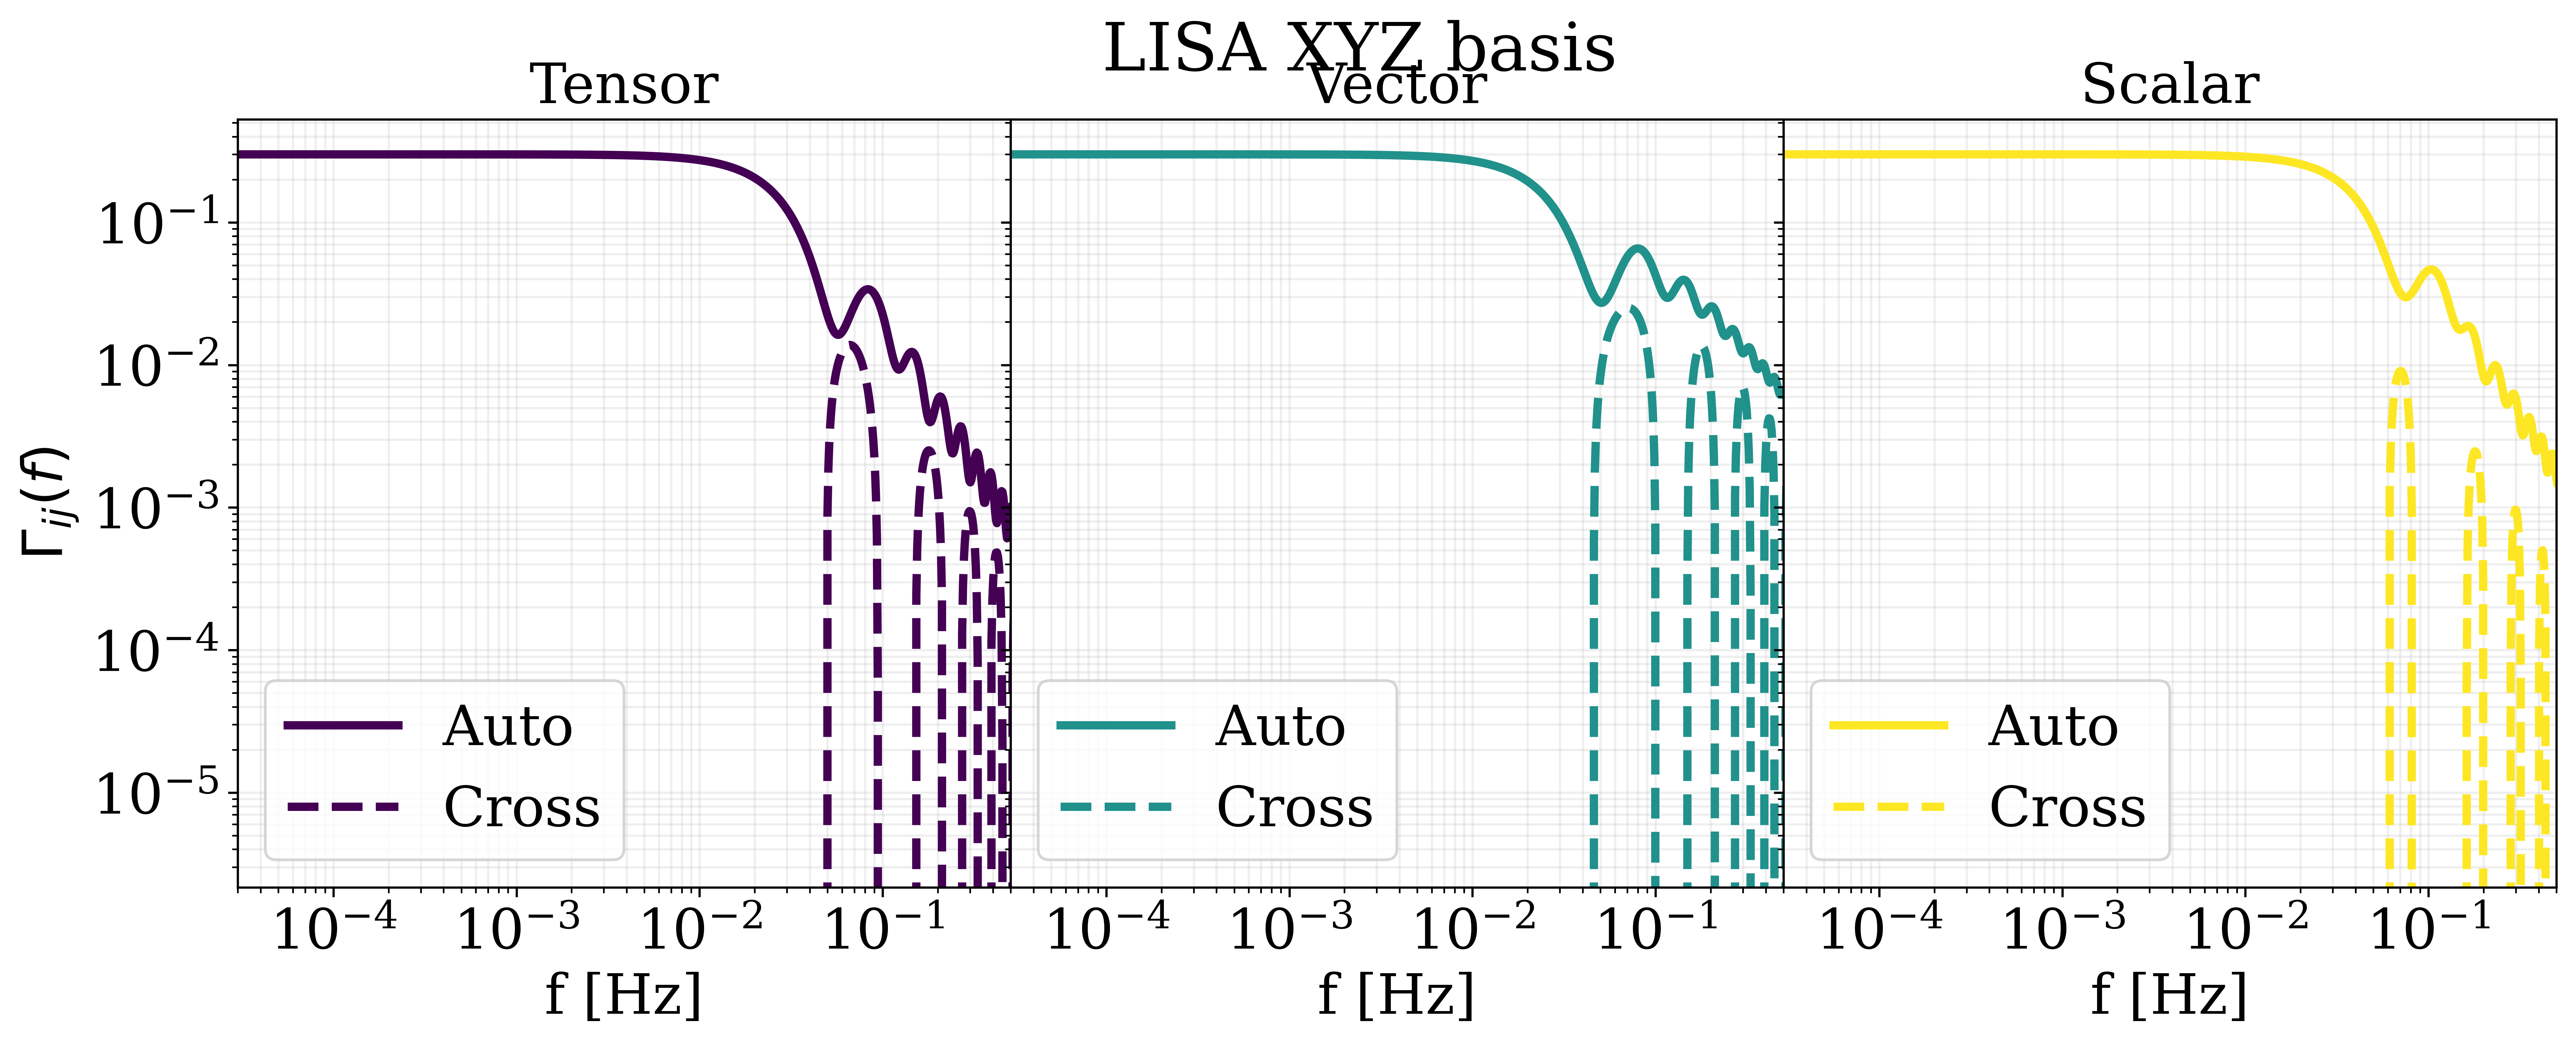

In [50]:
colors = cm.viridis(np.linspace(0, 1, 3))

# Crea la figura e gli assi
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(15, 5), gridspec_kw={'wspace': 0})

# Plot per il tensor
axs[0].plot(f, R_auto_t, label='Auto', color=colors[0])
axs[0].plot(f, R_cross_t, label='Cross', color=colors[0], linestyle='--')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel('f [Hz]')
axs[0].set_ylabel(r'$\Gamma_{ij}(f)$')
axs[0].legend()
axs[0].grid(alpha=0.2, which='both')
axs[0].set_xlim(3e-5, 5e-1)
axs[0].set_title('Tensor')

# Plot per il vector
axs[1].plot(f, R_auto_v, label='Auto', color=colors[1])
axs[1].plot(f, R_cross_v, label='Cross', color=colors[1], linestyle='--')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel('f [Hz]')
axs[1].legend()
axs[1].grid(alpha=0.2, which='both')
axs[1].set_xlim(3e-5, 5e-1)
axs[1].set_title('Vector')

# Plot per il scalar
axs[2].plot(f, R_auto_s, label='Auto', color=colors[2])
axs[2].plot(f, R_cross_s, label='Cross', color=colors[2], linestyle='--')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].set_xlabel('f [Hz]')
axs[2].legend()
axs[2].grid(alpha=0.2, which='both')
axs[2].set_xlim(3e-5, 5e-1)
axs[2].set_title('Scalar')

# Imposta il titolo principale
fig.suptitle('LISA XYZ basis')

plt.show()

In [51]:
# AET basis
f = np.logspace(-5, 0, 1000)
R_AA_t = Response.overlap_AET('AA', f, 0, 't')
R_AA_v = Response.overlap_AET('AA', f, 0, 'v')
R_AA_s = Response.overlap_AET('AA', f, 0, 's')

R_TT_t = Response.overlap_AET('TT', f, 0, 't')
R_TT_v = Response.overlap_AET('TT', f, 0, 'v')
R_TT_s = Response.overlap_AET('TT', f, 0, 's')


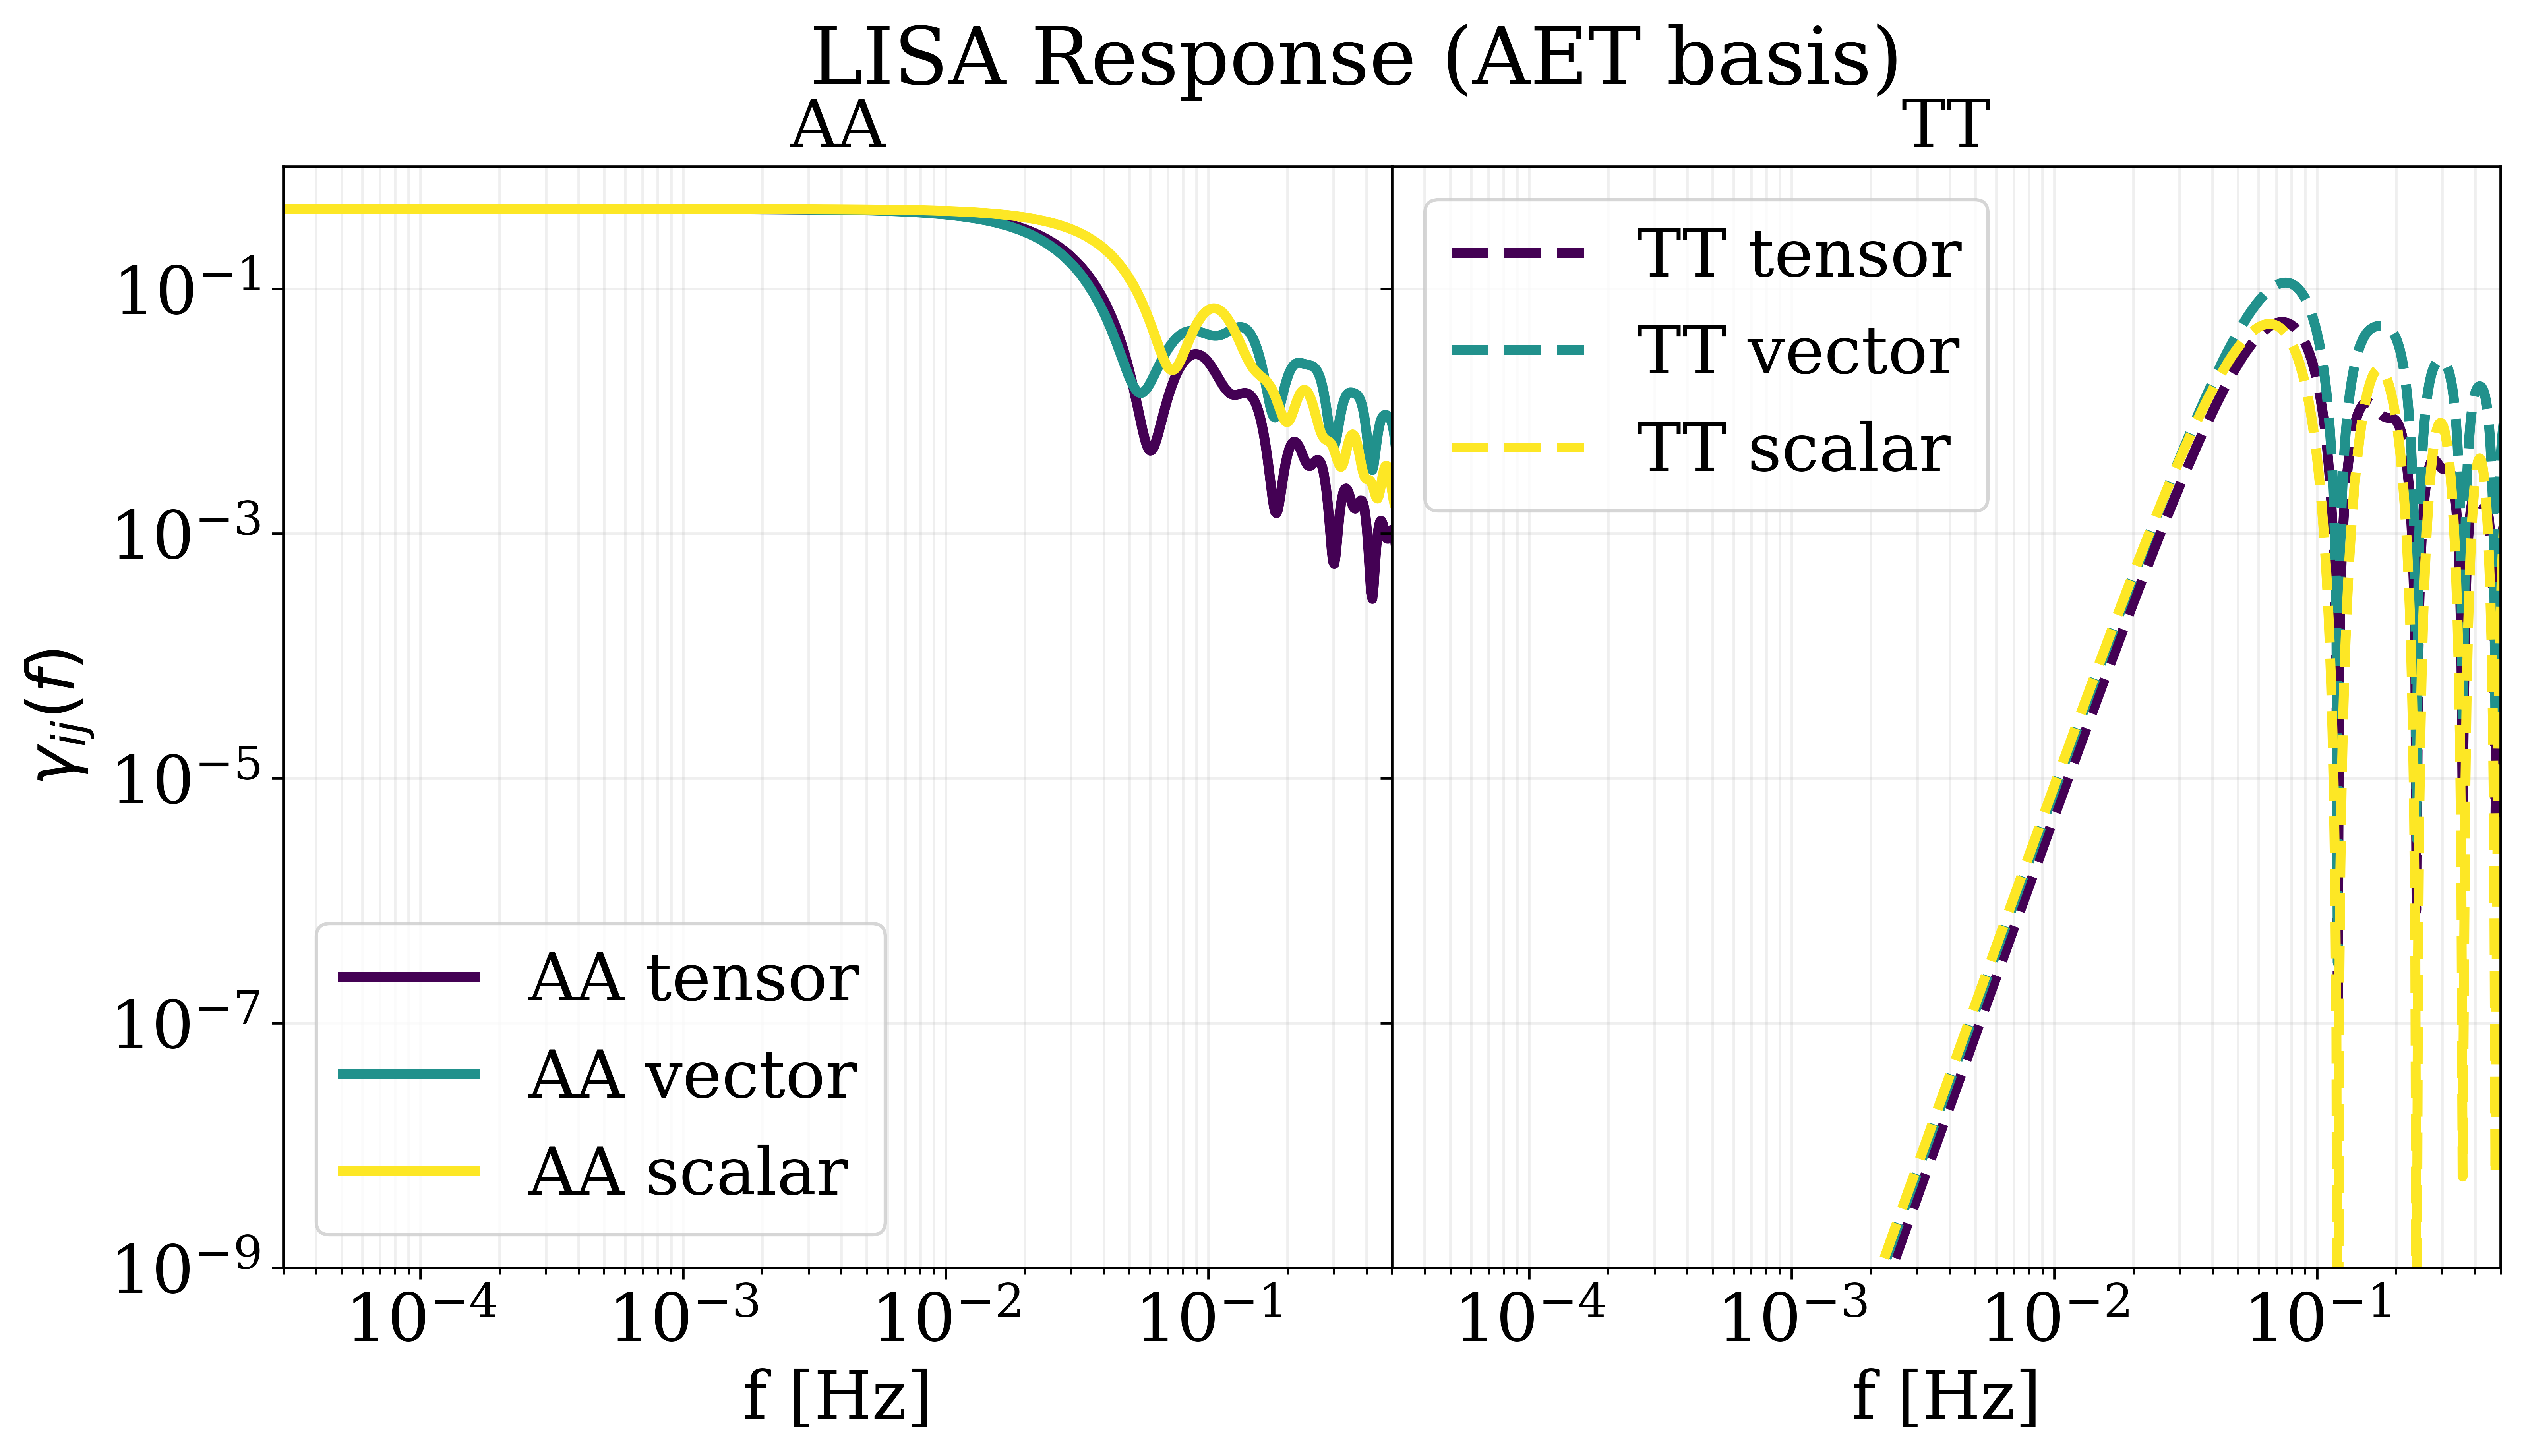

In [52]:
colors = cm.viridis(np.linspace(0, 1, 3))

# Crea la figura e gli assi
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(12, 6), gridspec_kw={'wspace': 0})

# Plot per le serie AA
axs[0].plot(f, R_AA_t, label='AA tensor', color=colors[0], rasterized=True)
axs[0].plot(f, R_AA_v, label='AA vector', color=colors[1], rasterized=True)
axs[0].plot(f, R_AA_s, label='AA scalar', color=colors[2], rasterized=True)
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel('f [Hz]')
axs[0].set_ylabel(r'$\gamma_{ij}(f)$')
axs[0].set_xlim(3e-5, 5e-1)
axs[0].set_ylim(1e-9, 1)
axs[0].legend()
axs[0].grid(alpha=0.2, which='both')
axs[0].set_title('AA')

# Plot per le serie TT
axs[1].plot(f, R_TT_t, label='TT tensor', color=colors[0], linestyle='--', rasterized=True)
axs[1].plot(f, R_TT_v, label='TT vector', color=colors[1], linestyle='--', rasterized=True)
axs[1].plot(f, R_TT_s, label='TT scalar', color=colors[2], linestyle='--', rasterized=True)
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel('f [Hz]')
axs[1].legend()
axs[1].set_xlim(3e-5, 5e-1)
axs[1].grid(alpha=0.2, which='both')
axs[1].set_title('TT')

# Imposta il titolo principale
fig.suptitle('LISA Response (AET basis)')

plt.show()

* Angular Response

In [53]:
print('Calculating l = 0 ...')

print(' * AA')

print('   - tensor')
LISA_R0_AA_t = AngularResponse.R_ell_AET(0, 'AA', 't', f)
print('   - vector')
LISA_R0_AA_v = AngularResponse.R_ell_AET(0, 'AA', 'v', f)
print('   - scalar')
LISA_R0_AA_s = AngularResponse.R_ell_AET(0, 'AA', 's', f)

print(' * TT')
print('   - tensor')
LISA_R0_TT_t = AngularResponse.R_ell_AET(0, 'TT', 't', f)
print('   - vector')
LISA_R0_TT_v = AngularResponse.R_ell_AET(0, 'TT', 'v', f)
print('   - scalar')
LISA_R0_TT_s = AngularResponse.R_ell_AET(0, 'TT', 's', f)

print('Calculating l = 1 ...')

print(' * AE')
print('   - tensor')
LISA_R1_AE_t = AngularResponse.R_ell_AET(1, 'AE', 't', f)
print('   - vector')
LISA_R1_AE_v = AngularResponse.R_ell_AET(1, 'AE', 'v', f)
print('   - scalar')
LISA_R1_AE_s = AngularResponse.R_ell_AET(1, 'AE', 's', f)

print(' * AT')
print('   - tensor')
LISA_R1_AT_t = AngularResponse.R_ell_AET(1, 'AT', 't', f)
print('   - vector')
LISA_R1_AT_v = AngularResponse.R_ell_AET(1, 'AT', 'v', f)
print('   - scalar')
LISA_R1_AT_s = AngularResponse.R_ell_AET(1, 'AT', 's', f)

print('Calculating l = 2 ...')  

print(' * AA')
print('   - tensor')
LISA_R2_AA_t = AngularResponse.R_ell_AET(2, 'AA', 't', f)
print('   - vector')
LISA_R2_AA_v = AngularResponse.R_ell_AET(2, 'AA', 'v', f)
print('   - scalar')
LISA_R2_AA_s = AngularResponse.R_ell_AET(2, 'AA', 's', f)

print(' * TT')
print('   - tensor')
LISA_R2_TT_t = AngularResponse.R_ell_AET(2, 'TT', 't', f)
print('   - vector')
LISA_R2_TT_v = AngularResponse.R_ell_AET(2, 'TT', 'v', f)
print('   - scalar')
LISA_R2_TT_s = AngularResponse.R_ell_AET(2, 'TT', 's', f)

print(' * AE')
print('   - tensor')
LISA_R2_AE_t = AngularResponse.R_ell_AET(2, 'AE', 't', f)
print('   - vector')
LISA_R2_AE_v = AngularResponse.R_ell_AET(2, 'AE', 'v', f)
print('   - scalar')
LISA_R2_AE_s = AngularResponse.R_ell_AET(2, 'AE', 's', f)

print(' * AT')
print('   - tensor')
LISA_R2_AT_t = AngularResponse.R_ell_AET(2, 'AT', 't', f)
print('   - vector')
LISA_R2_AT_v = AngularResponse.R_ell_AET(2, 'AT', 'v', f)
print('   - scalar')
LISA_R2_AT_s = AngularResponse.R_ell_AET(2, 'AT', 's', f)

print('Calculating l = 3 ...')

print(' * AE')
print('   - tensor')
LISA_R3_AE_t = AngularResponse.R_ell_AET(3, 'AE', 't', f)
print('   - vector')
LISA_R3_AE_v = AngularResponse.R_ell_AET(3, 'AE', 'v', f)
print('   - scalar')
LISA_R3_AE_s = AngularResponse.R_ell_AET(3, 'AE', 's', f)

print(' * AT')
print('   - tensor')
LISA_R3_AT_t = AngularResponse.R_ell_AET(3, 'AT', 't', f)
print('   - vector')
LISA_R3_AT_v = AngularResponse.R_ell_AET(3, 'AT', 'v', f)
print('   - scalar')
LISA_R3_AT_s = AngularResponse.R_ell_AET(3, 'AT', 's', f)


Calculating l = 0 ...
 * AA
   - tensor
   - vector
   - scalar
 * TT
   - tensor
   - vector
   - scalar
Calculating l = 1 ...
 * AE
   - tensor
   - vector
   - scalar
 * AT
   - tensor
   - vector
   - scalar
Calculating l = 2 ...
 * AA
   - tensor
   - vector
   - scalar
 * TT
   - tensor
   - vector
   - scalar
 * AE
   - tensor
   - vector
   - scalar
 * AT
   - tensor
   - vector
   - scalar
Calculating l = 3 ...
 * AE
   - tensor
   - vector
   - scalar
 * AT
   - tensor
   - vector
   - scalar


In [54]:
colors = cm.viridis(np.linspace(0, 1, 3))

fig, axs = plt.subplots(2, 2, figsize=(16, 14), gridspec_kw={'wspace': 0.2, 'hspace': 0.3})

axs[0,0].loglog(f, LISA_R0_AA_t, label=r'$\ell=0$ tensor', color=colors[0], rasterized=True)
axs[0,0].loglog(f, LISA_R0_AA_v, label=r'$\ell=0$ vector', color=colors[1], rasterized=True)
axs[0,0].loglog(f, LISA_R0_AA_s, label=r'$\ell=0$ scalar', color=colors[2], rasterized=True)
axs[0,0].loglog(f, LISA_R2_AA_t, label=r'$\ell=2$ tensor', color=colors[0], linestyle = '--', rasterized=True)
axs[0,0].loglog(f, LISA_R2_AA_v, label=r'$\ell=2$ vector', color=colors[1], linestyle = '--', rasterized=True)
axs[0,0].loglog(f, LISA_R2_AA_s, label=r'$\ell=2$ scalar', color=colors[2], linestyle = '--', rasterized=True)
axs[0,0].set_xlabel('f [Hz]')
axs[0,0].set_ylabel(r'$R_{\ell}$')
axs[0,0].set_ylim(1e-7, 1)
axs[0,0].set_xlim(1e-5, 5e-1)
axs[0,0].legend()
axs[0,0].grid(alpha=0.2, which='both')
axs[0,0].set_title(r'$AA$')

axs[0,1].loglog(f, LISA_R0_TT_t, label='tensor', color=colors[0], rasterized=True)
axs[0,1].loglog(f, LISA_R0_TT_v, label='vector', color=colors[1], rasterized=True)
axs[0,1].loglog(f, LISA_R0_TT_s, label='scalar', color=colors[2], rasterized=True)
axs[0,1].loglog(f, LISA_R2_TT_t, label='tensor', color=colors[0], linestyle = '--', rasterized=True)
axs[0,1].loglog(f, LISA_R2_TT_v, label='vector', color=colors[1], linestyle = '--', rasterized=True)
axs[0,1].loglog(f, LISA_R2_TT_s, label='scalar', color=colors[2], linestyle = '--', rasterized=True)
axs[0,1].set_xlabel('f [Hz]')
axs[0,1].set_ylim(1e-7, 1)
axs[0,1].set_xlim(1e-2, 5e-1)
axs[0,1].grid(alpha=0.2, which='both')
axs[0,1].set_title(r'$TT$')

axs[1,0].loglog(f, LISA_R2_AE_t, label='tensor', color=colors[0], linestyle = '--', rasterized=True)
axs[1,0].loglog(f, LISA_R2_AE_v, label='vector', color=colors[1], linestyle = '--', rasterized=True)
axs[1,0].loglog(f, LISA_R2_AE_s, label='scalar', color=colors[2], linestyle = '--', rasterized=True)
axs[1,0].set_xlabel('f [Hz]')
axs[1,0].set_ylabel(r'$R_{\ell}$')
axs[1,0].set_xlim(1e-5, 5e-1)
axs[1,0].grid(alpha=0.2, which='both')
axs[1,0].set_title(r'$AE$')

axs[1,1].loglog(f, LISA_R2_AT_t, label='tensor', color=colors[0], linestyle = '--', rasterized=True)
axs[1,1].loglog(f, LISA_R2_AT_v, label='vector', color=colors[1], linestyle = '--', rasterized=True)
axs[1,1].loglog(f, LISA_R2_AT_s, label='scalar', color=colors[2], linestyle = '--', rasterized=True)
axs[1,1].set_xlabel('f [Hz]')
axs[1,1].set_ylim(1e-7, 1)
axs[1,1].set_xlim(1e-3, 5e-1)
axs[1,1].grid(alpha=0.2, which='both')
axs[1,1].set_title(r'$AT$')

fig.suptitle(r'LISA Angular Response (even multipoles)')


Text(0.5, 0.98, 'LISA Angular Response (even multipoles)')

Text(0.5, 0.98, 'LISA Angular Response (odd multipoles)')

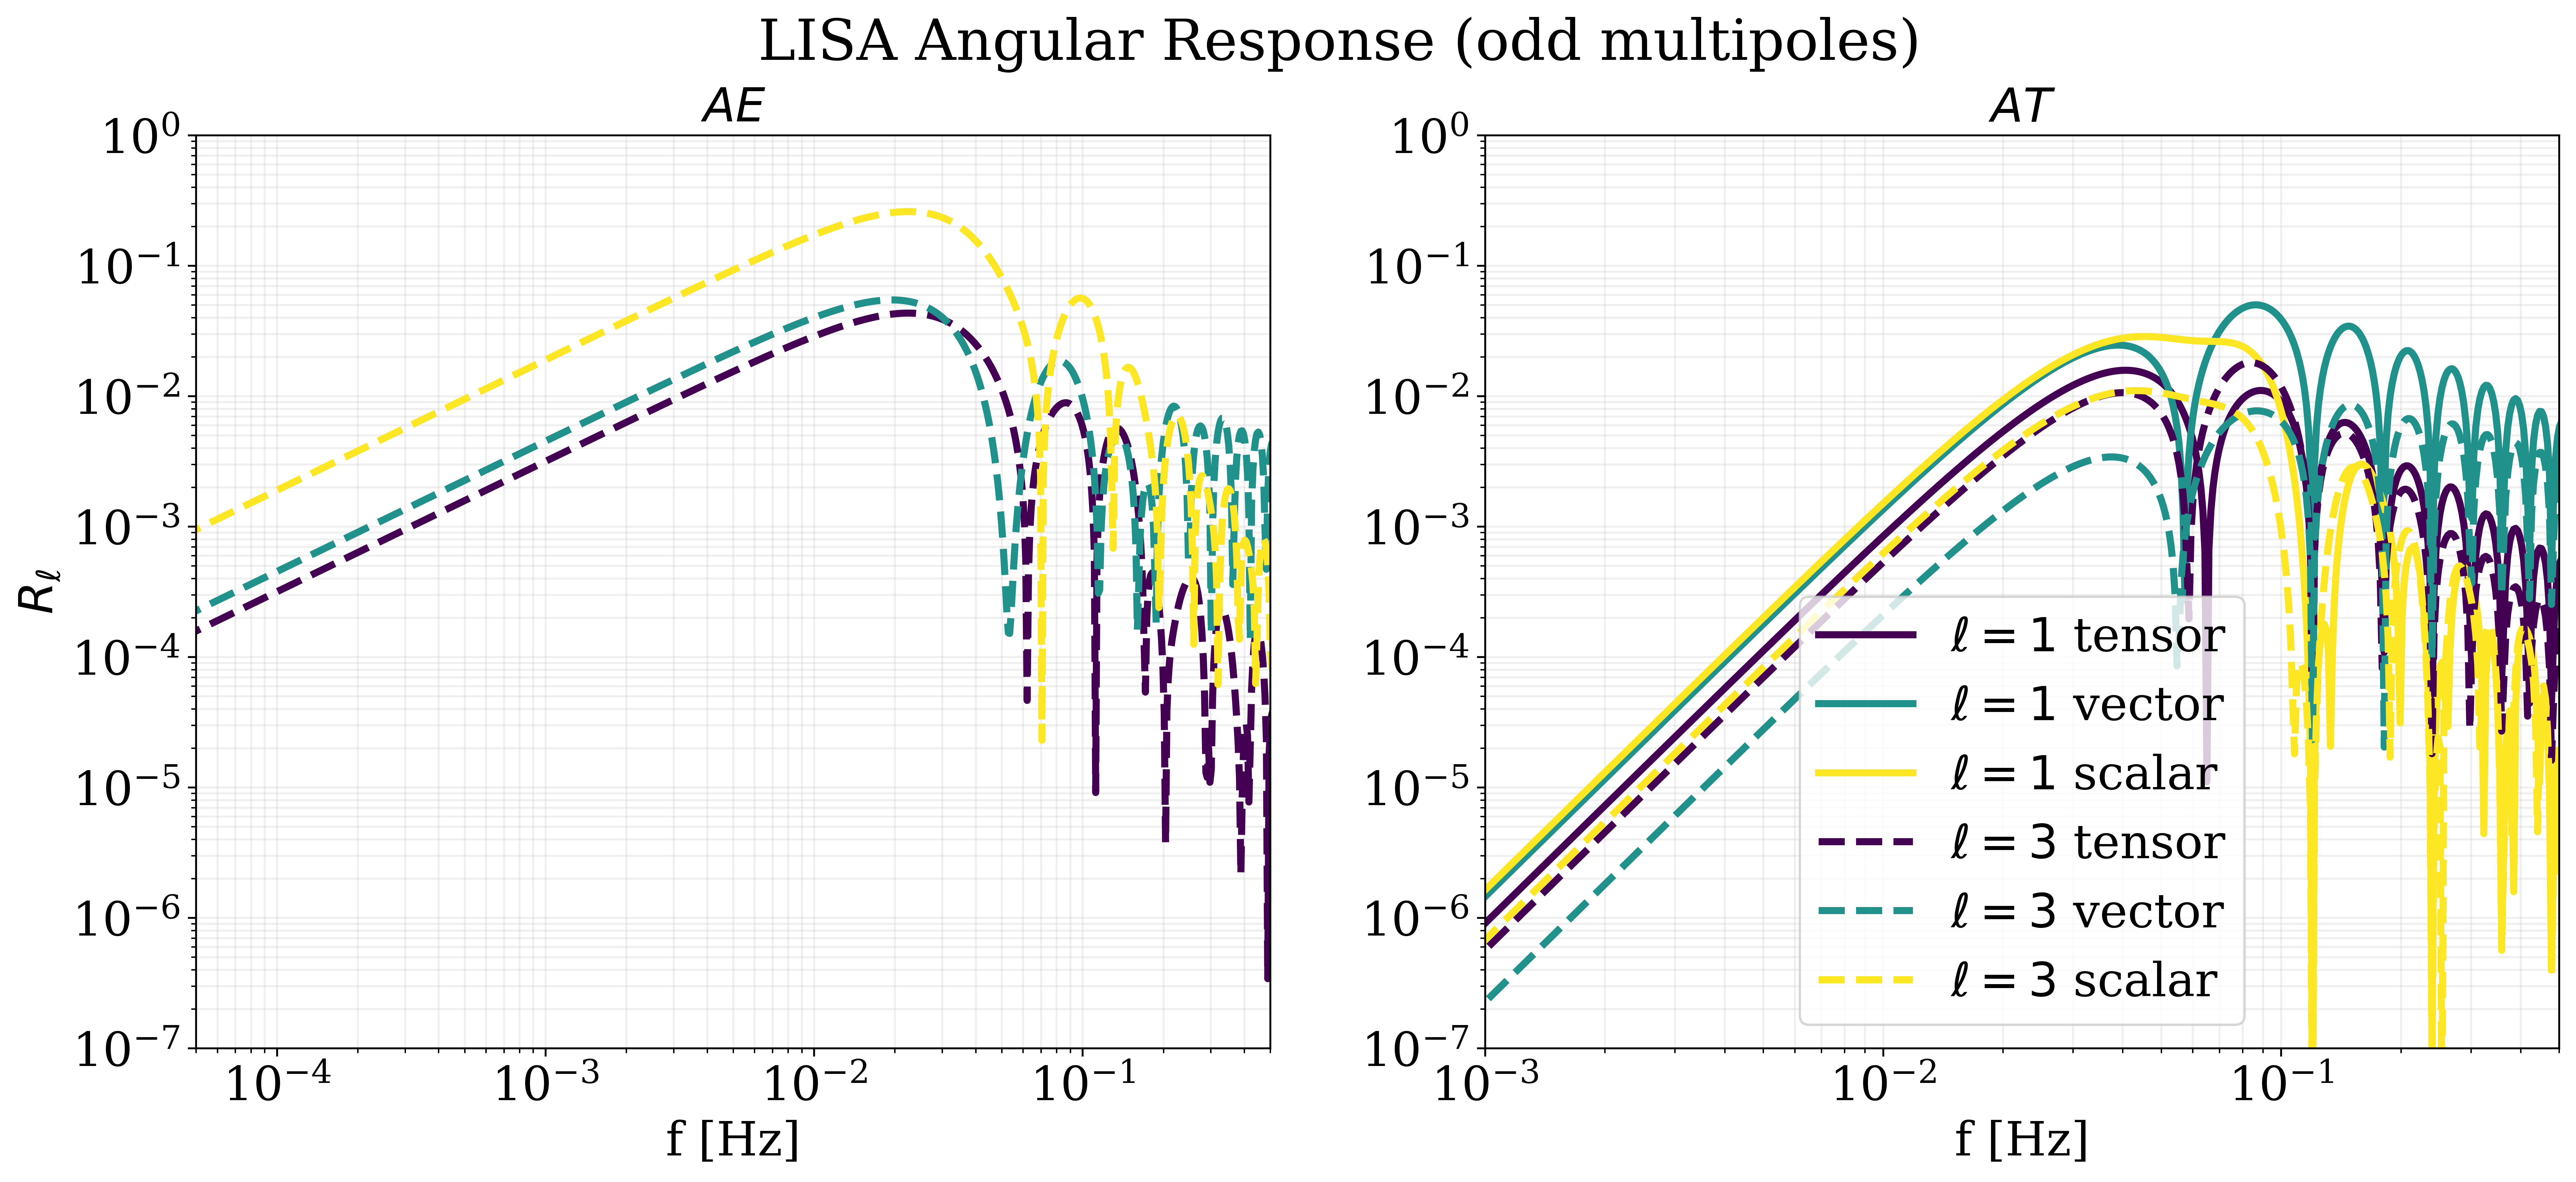

In [55]:
fig, axs = plt.subplots(1, 2, figsize=(18, 7),  gridspec_kw={'wspace': 0.2, 'hspace': 0.1})


axs[0].loglog(f, LISA_R3_AE_t, label=r'$\ell=1$ tensor', color=colors[0], linestyle = '--', rasterized=True)
axs[0].loglog(f, LISA_R3_AE_v, label=r'$\ell=1$ vector', color=colors[1], linestyle = '--', rasterized=True)
axs[0].loglog(f, LISA_R3_AE_s, label=r'$\ell=1$ scalar', color=colors[2], linestyle = '--', rasterized=True)
axs[0].set_xlabel('f [Hz]')
axs[0].set_ylabel(r'$R_{\ell}$')
axs[0].grid(alpha=0.2, which='both')
axs[0].set_xlim(5e-5, 5e-1)
axs[0].set_ylim(1e-7, 1)
axs[0].set_title(r'$AE$')

axs[1].loglog(f, LISA_R1_AT_t, label=r'$\ell=1$ tensor', color=colors[0], rasterized=True)
axs[1].loglog(f, LISA_R1_AT_v, label=r'$\ell=1$ vector', color=colors[1], rasterized=True)
axs[1].loglog(f, LISA_R1_AT_s, label=r'$\ell=1$ scalar', color=colors[2], rasterized=True)
axs[1].loglog(f, LISA_R3_AT_t, label=r'$\ell=3$ tensor', color=colors[0], linestyle = '--', rasterized=True)
axs[1].loglog(f, LISA_R3_AT_v, label=r'$\ell=3$ vector', color=colors[1], linestyle = '--', rasterized=True)
axs[1].loglog(f, LISA_R3_AT_s, label=r'$\ell=3$ scalar', color=colors[2], linestyle = '--', rasterized=True)
axs[1].set_xlabel('f [Hz]')
axs[1].set_xlim(1e-3, 5e-1)
axs[1].set_ylim(1e-7, 1)
axs[1].legend()
axs[1].grid(alpha=0.2, which='both')
axs[1].set_title(r'$AT$')

fig.suptitle(r'LISA Angular Response (odd multipoles)')

* Power Law Integrated Sensitivity Curve

/Users/ic/Desktop/GWBird/gwbird/pls.py:277: RuntimeWarning: divide by zero encountered in divide
  return np.sqrt(Ni*Nj)/np.abs(orf)


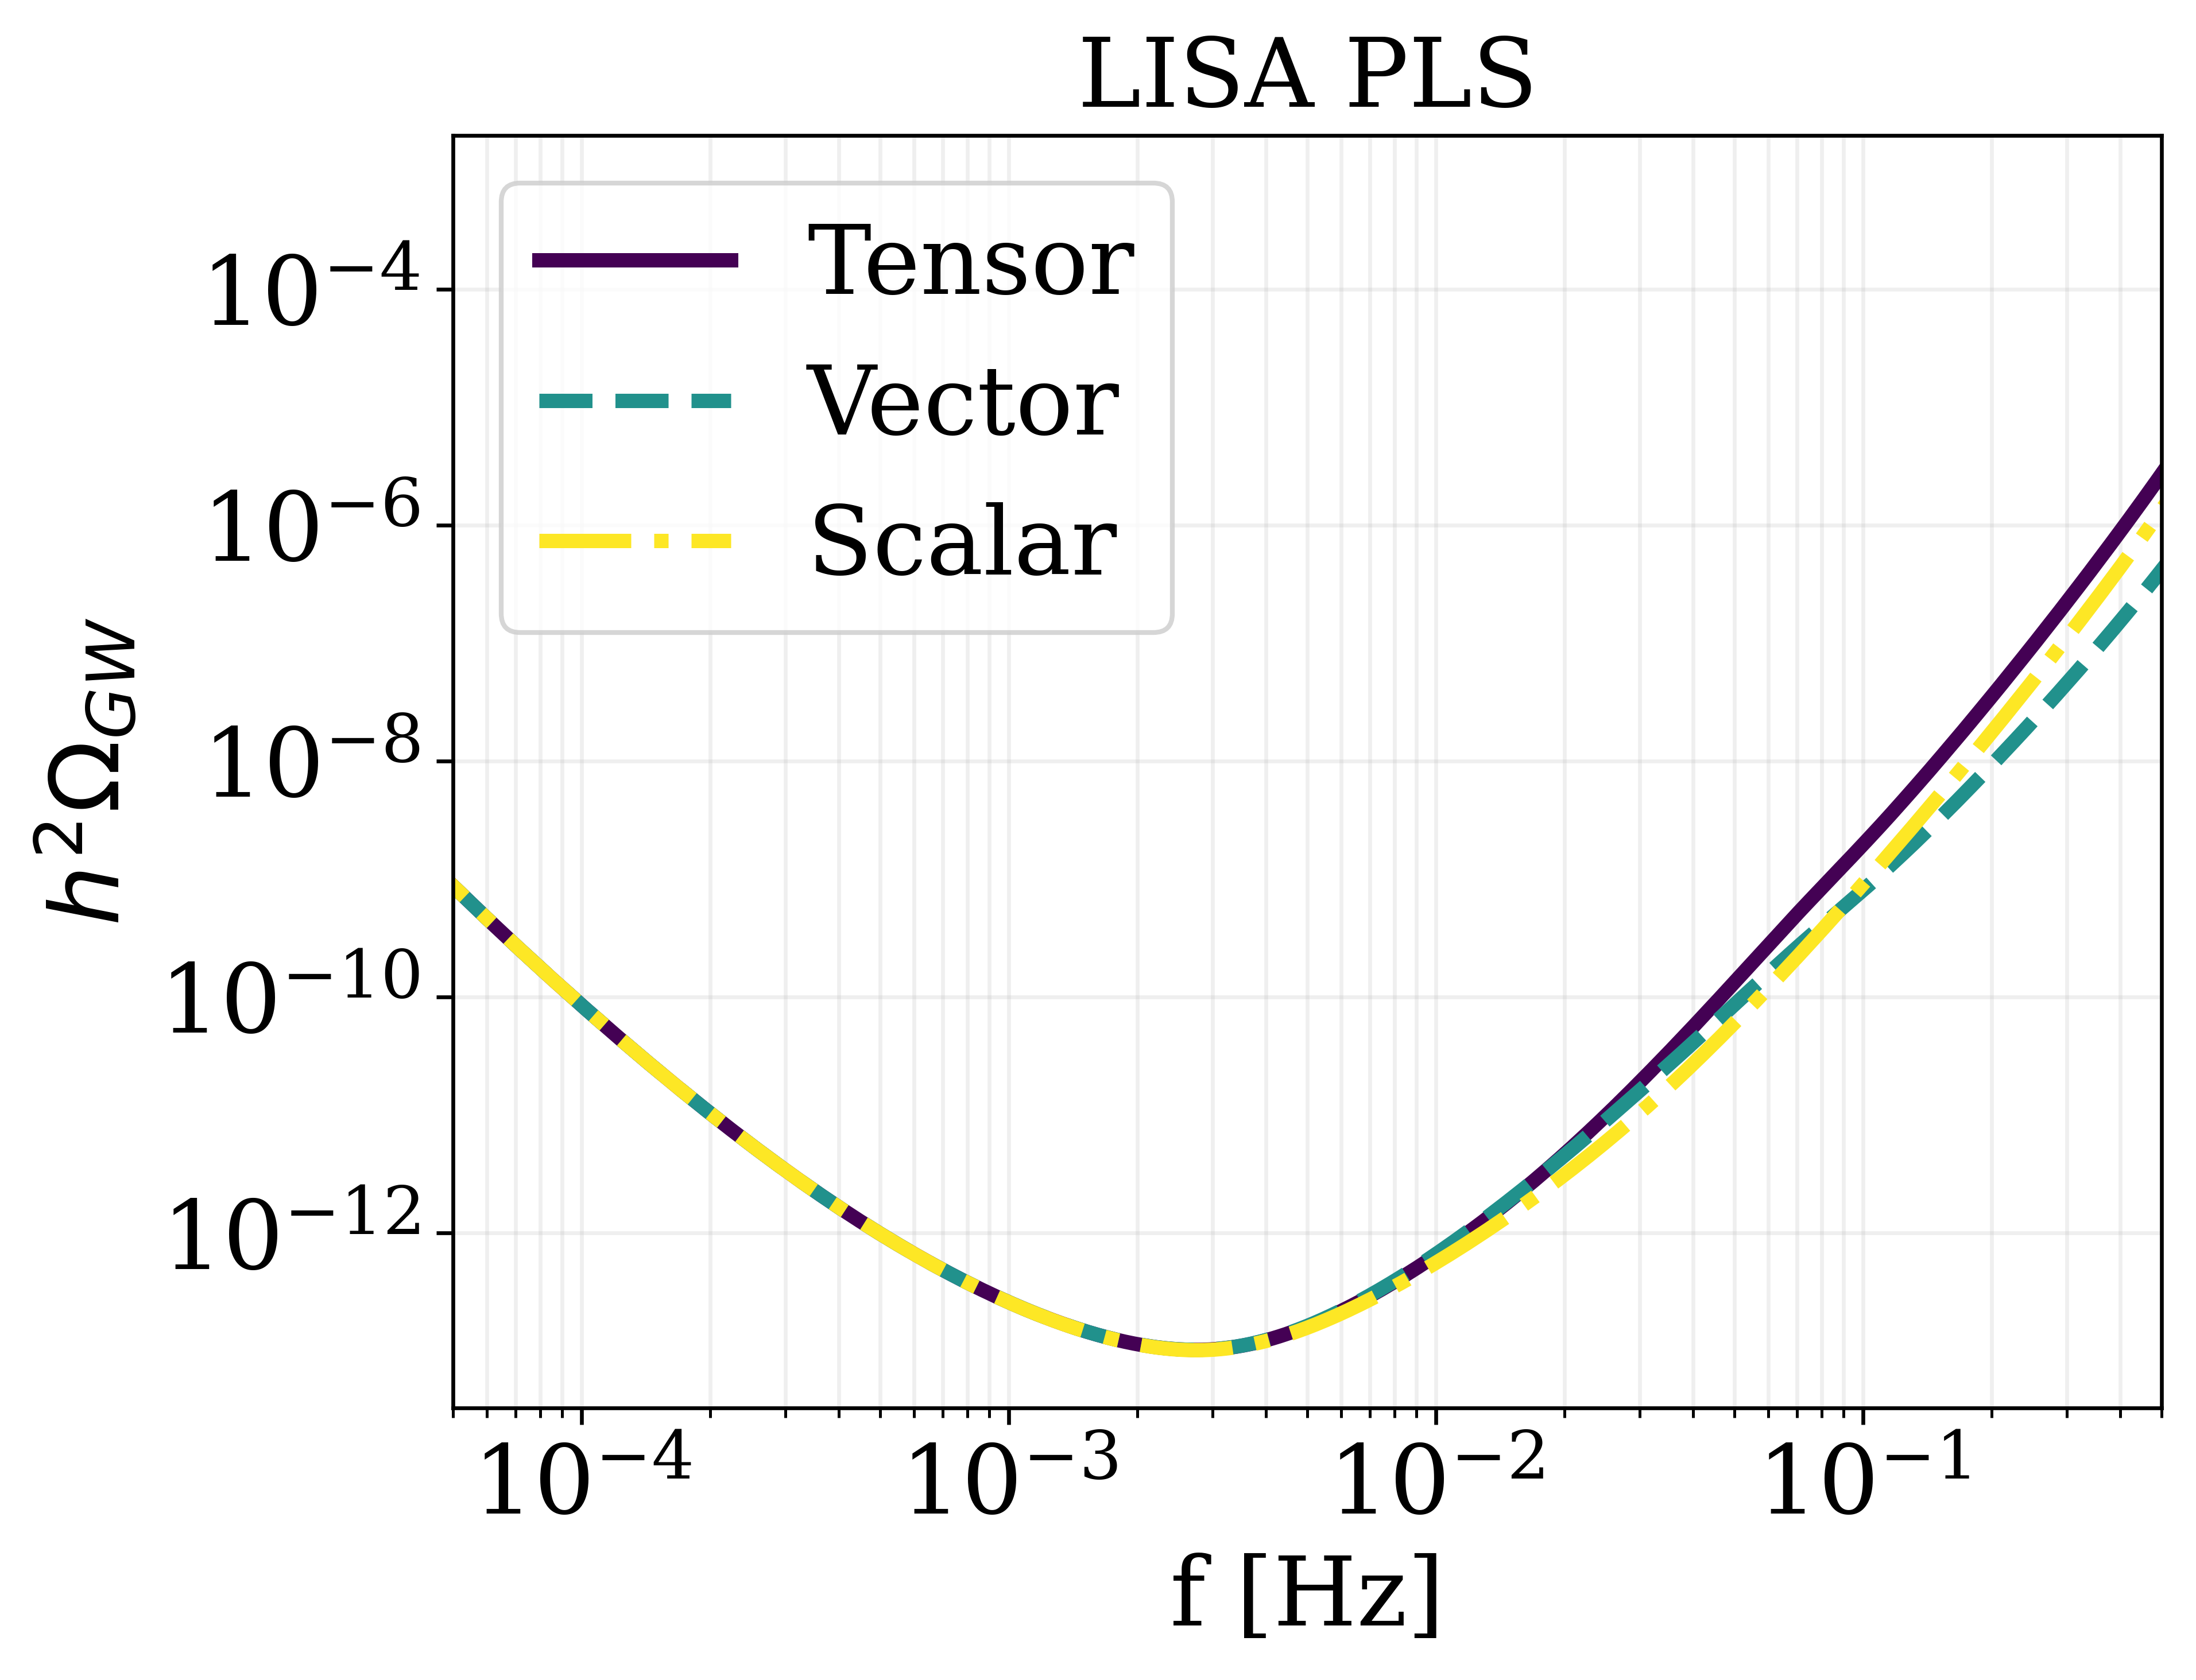

In [56]:
fref = 1e-2
snr = 10
Tobs = 3
beta_min = -40
beta_max = 40

pls_LISA_t = pls.PLS_LISA(f, fref, 't', snr, Tobs, beta_min, beta_max)
pls_LISA_v = pls.PLS_LISA(f, fref, 'v', snr, Tobs, beta_min, beta_max)
pls_LISA_s = pls.PLS_LISA(f, fref, 's', snr, Tobs, beta_min, beta_max)

colors = plt.cm.viridis(np.linspace(0, 1, 3))

plt.plot(f, pls_LISA_t, label='Tensor', color=colors[0])
plt.plot(f, pls_LISA_v, label='Vector', color=colors[1], linestyle='--')
plt.plot(f, pls_LISA_s, label='Scalar', color=colors[2], linestyle='-.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{GW}$')
plt.xlim(5e-5, 5e-1)
plt.grid(alpha=0.2, which='both')
plt.title(r'LISA PLS')
plt.legend()

In [57]:
print(np.min(pls_LISA_t))
print(np.min(pls_LISA_v))
print(np.min(pls_LISA_s))

1.0192265996364778e-13
1.0204620664912295e-13
1.0127989779222249e-13


* Angular Sensitivity

In [61]:
f_new = np.logspace(-5, 0, 100)
f = np.logspace(-5, 0, 1000)
pls_LISA_t = pls.PLS_LISA(f, fref, 't', snr, Tobs, beta_min, beta_max)
pls_LISA_monopole = Sensitivity_ell.PLS_l_LISA(f, 0, 't', fref, snr, Tobs, beta_min, beta_max, 1)

print(np.min(pls_LISA_monopole))
print(pls_LISA_monopole.shape)

/Users/ic/Desktop/GWBird/gwbird/pls.py:277: RuntimeWarning: divide by zero encountered in divide
  return np.sqrt(Ni*Nj)/np.abs(orf)


1.0192265996364778e-13
(1000,)


In [ ]:
pls_LISA_dipole_t = Sensitivity_ell.PLS_l_LISA(f, 1, 't', fref, snr, Tobs, beta_min, beta_max, 1e-3)
pls_LISA_quadrupole_t = Sensitivity_ell.PLS_l_LISA(f, 2, 't', fref, snr, Tobs, beta_min, beta_max, 1e-3)
pls_LISA_octupole_t = Sensitivity_ell.PLS_l_LISA(f, 3, 't', fref, snr, Tobs, beta_min, beta_max, 1e-3)


AE
AT
AE
AT


1.0192265996364754e-13
2.489103284917288e-09
5.051655195350279e-12
1.9573875446314616e-10


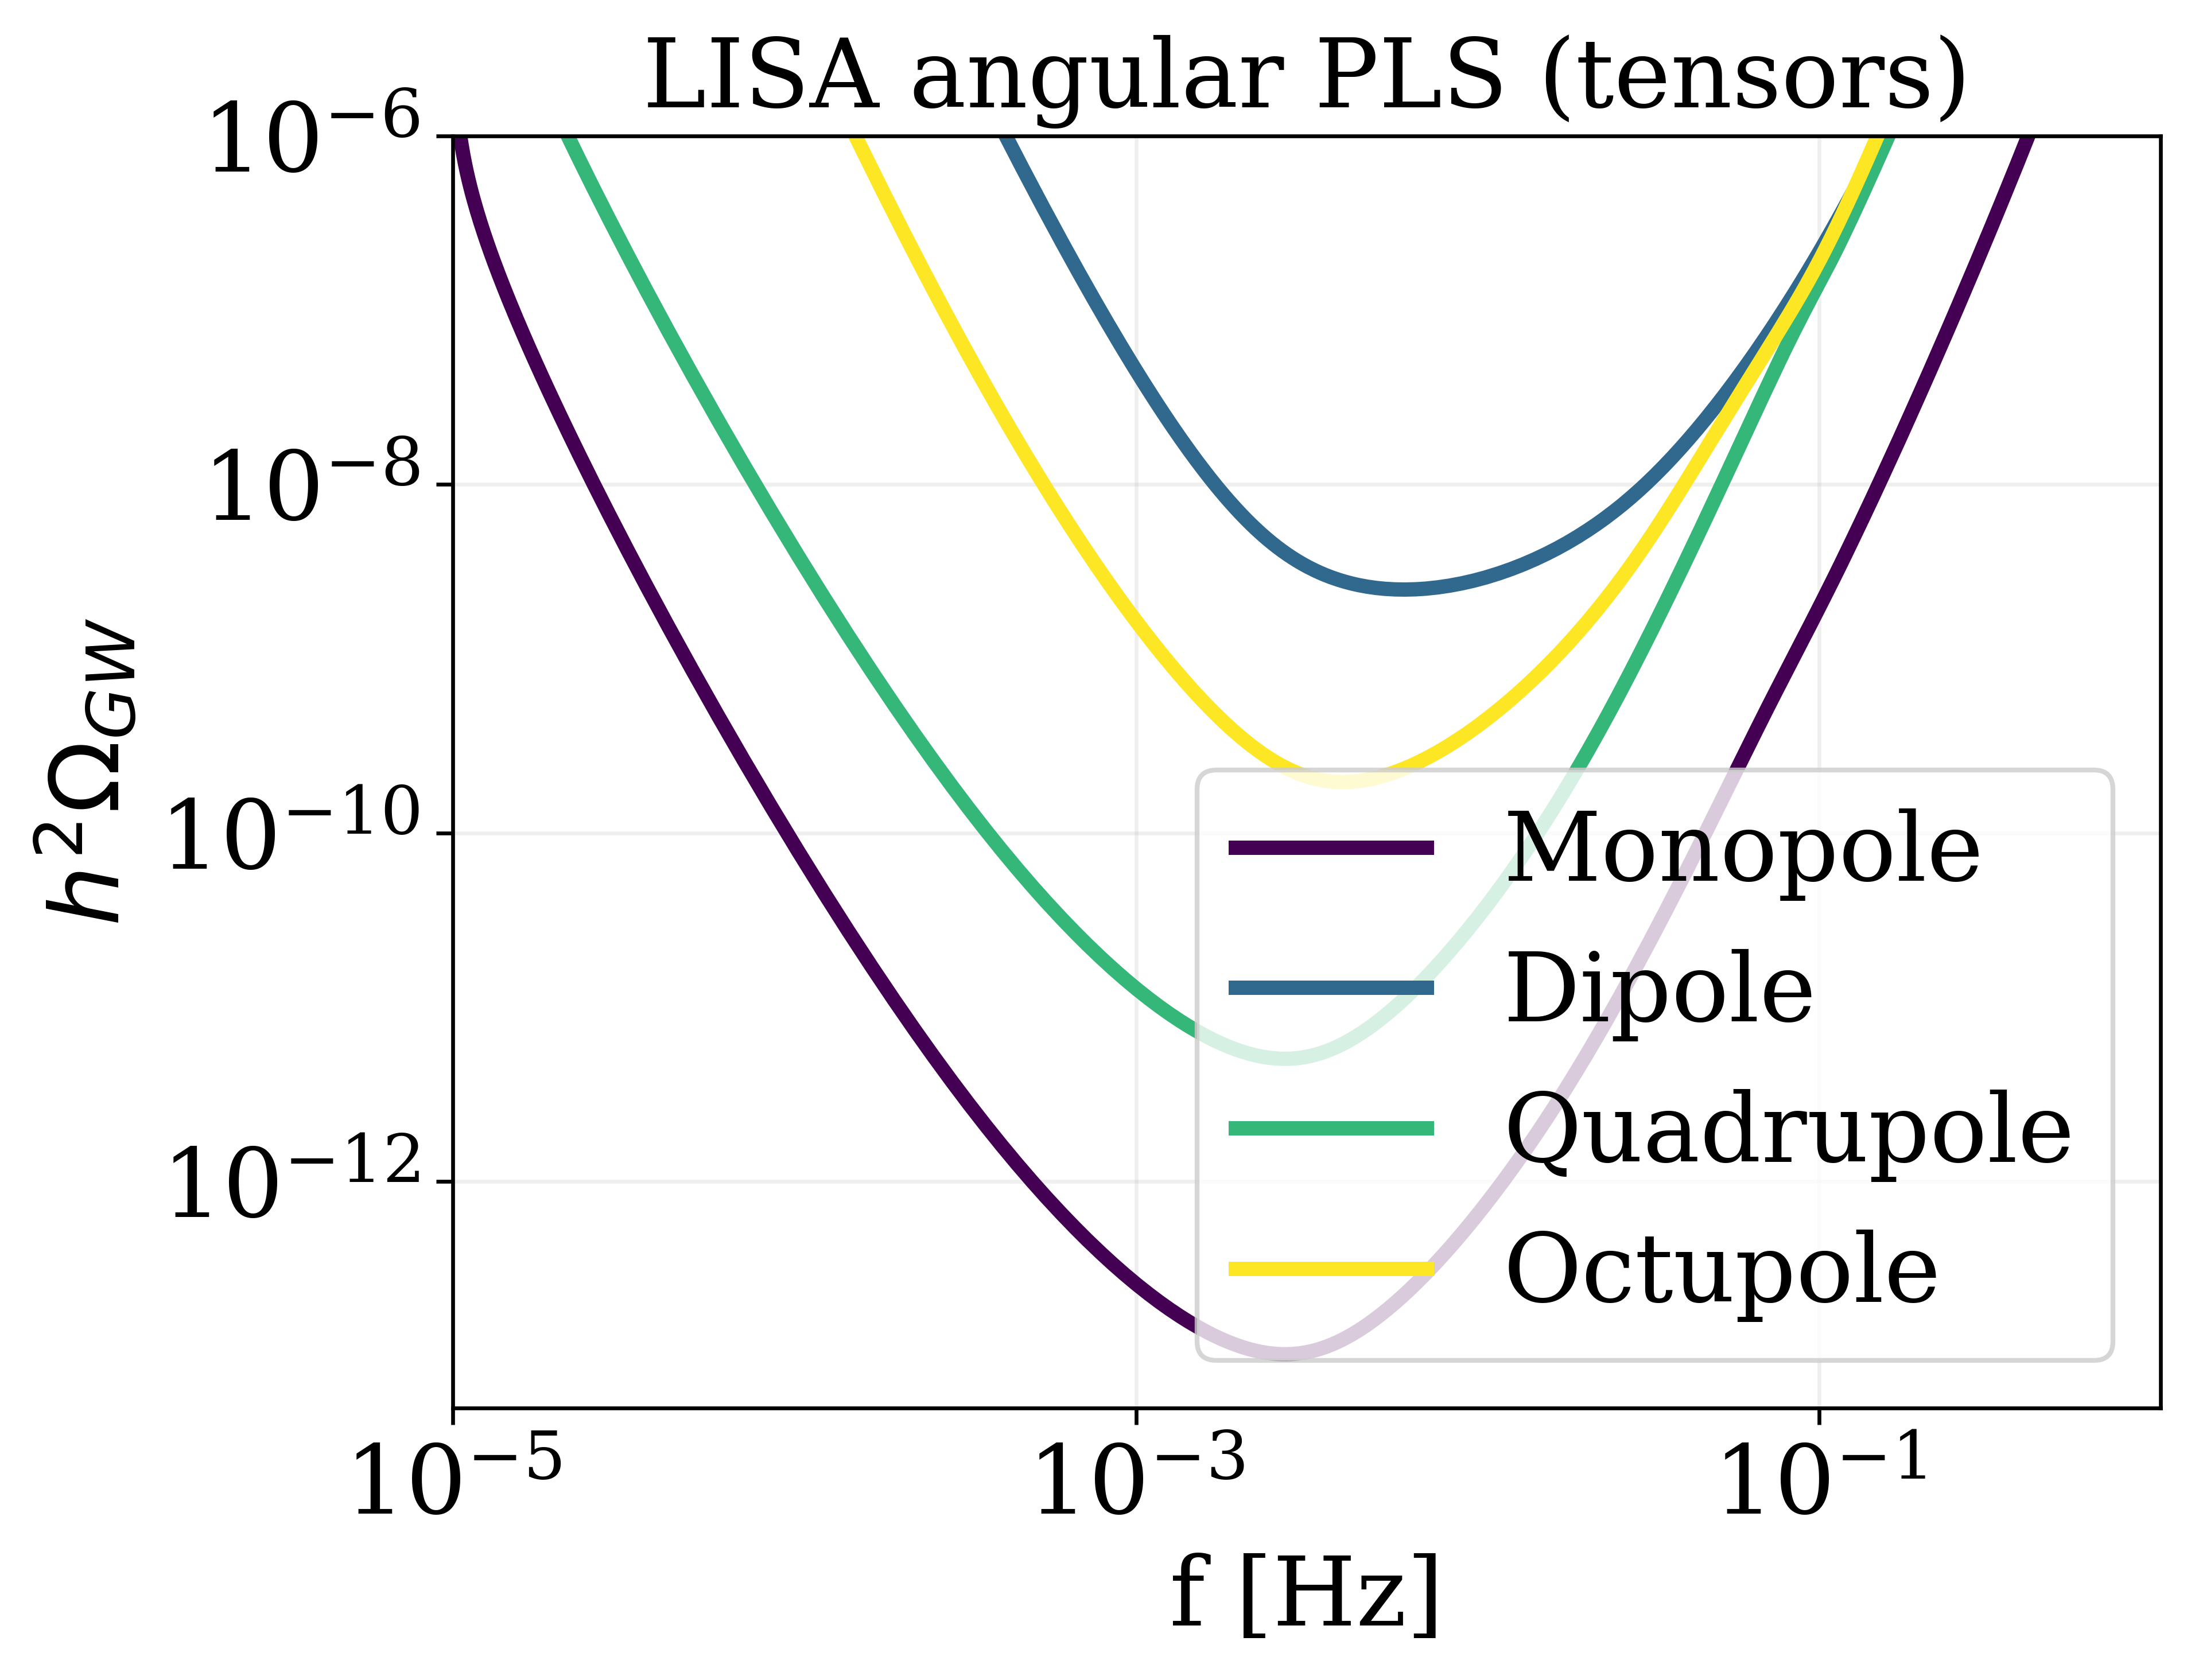

In [ ]:
colors = plt.cm.viridis(np.linspace(0, 1, 4))

plt.plot(f, pls_LISA_monopole, label='Monopole', color=colors[0], rasterized=True)
plt.plot(f, pls_LISA_dipole_t, label='Dipole', color=colors[1], rasterized=True)
plt.plot(f, pls_LISA_quadrupole_t, label='Quadrupole', color=colors[2], rasterized=True)
plt.plot(f, pls_LISA_octupole_t, label='Octupole', color=colors[3], rasterized=True)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{GW}$')
plt.grid(alpha=0.2, which='both')
plt.legend()
plt.xlim(1e-5, 1)
plt.ylim(5e-14, 1e-6)
plt.title(r'LISA angular PLS (tensors)')


print(np.min(pls_LISA_monopole))
print(np.min(pls_LISA_dipole_t))
print(np.min(pls_LISA_quadrupole_t))
print(np.min(pls_LISA_octupole_t))

In [63]:
# vector 

pls_LISA_v = pls.PLS_LISA(f, fref, 'v', snr, Tobs, beta_min, beta_max)
pls_LISA_monopole_v = Sensitivity_ell.PLS_l_LISA(f, 0, 'v', fref, snr, Tobs, beta_min, beta_max, 1)
pls_LISA_dipole_v = Sensitivity_ell.PLS_l_LISA(f, 1, 'v', fref, snr, Tobs, beta_min, beta_max, 1e-3)
pls_LISA_quadrupole_v = Sensitivity_ell.PLS_l_LISA(f, 2, 'v', fref, snr, Tobs, beta_min, beta_max, 1e-3)
pls_LISA_octupole_v = Sensitivity_ell.PLS_l_LISA(f, 3, 'v', fref, snr, Tobs, beta_min, beta_max, 1e-3)

/Users/ic/Desktop/GWBird/gwbird/pls.py:277: RuntimeWarning: divide by zero encountered in divide
  return np.sqrt(Ni*Nj)/np.abs(orf)


1.020462066491279e-13
1.5514008453725642e-09
1.011327499072682e-11
1.3799591346355644e-10


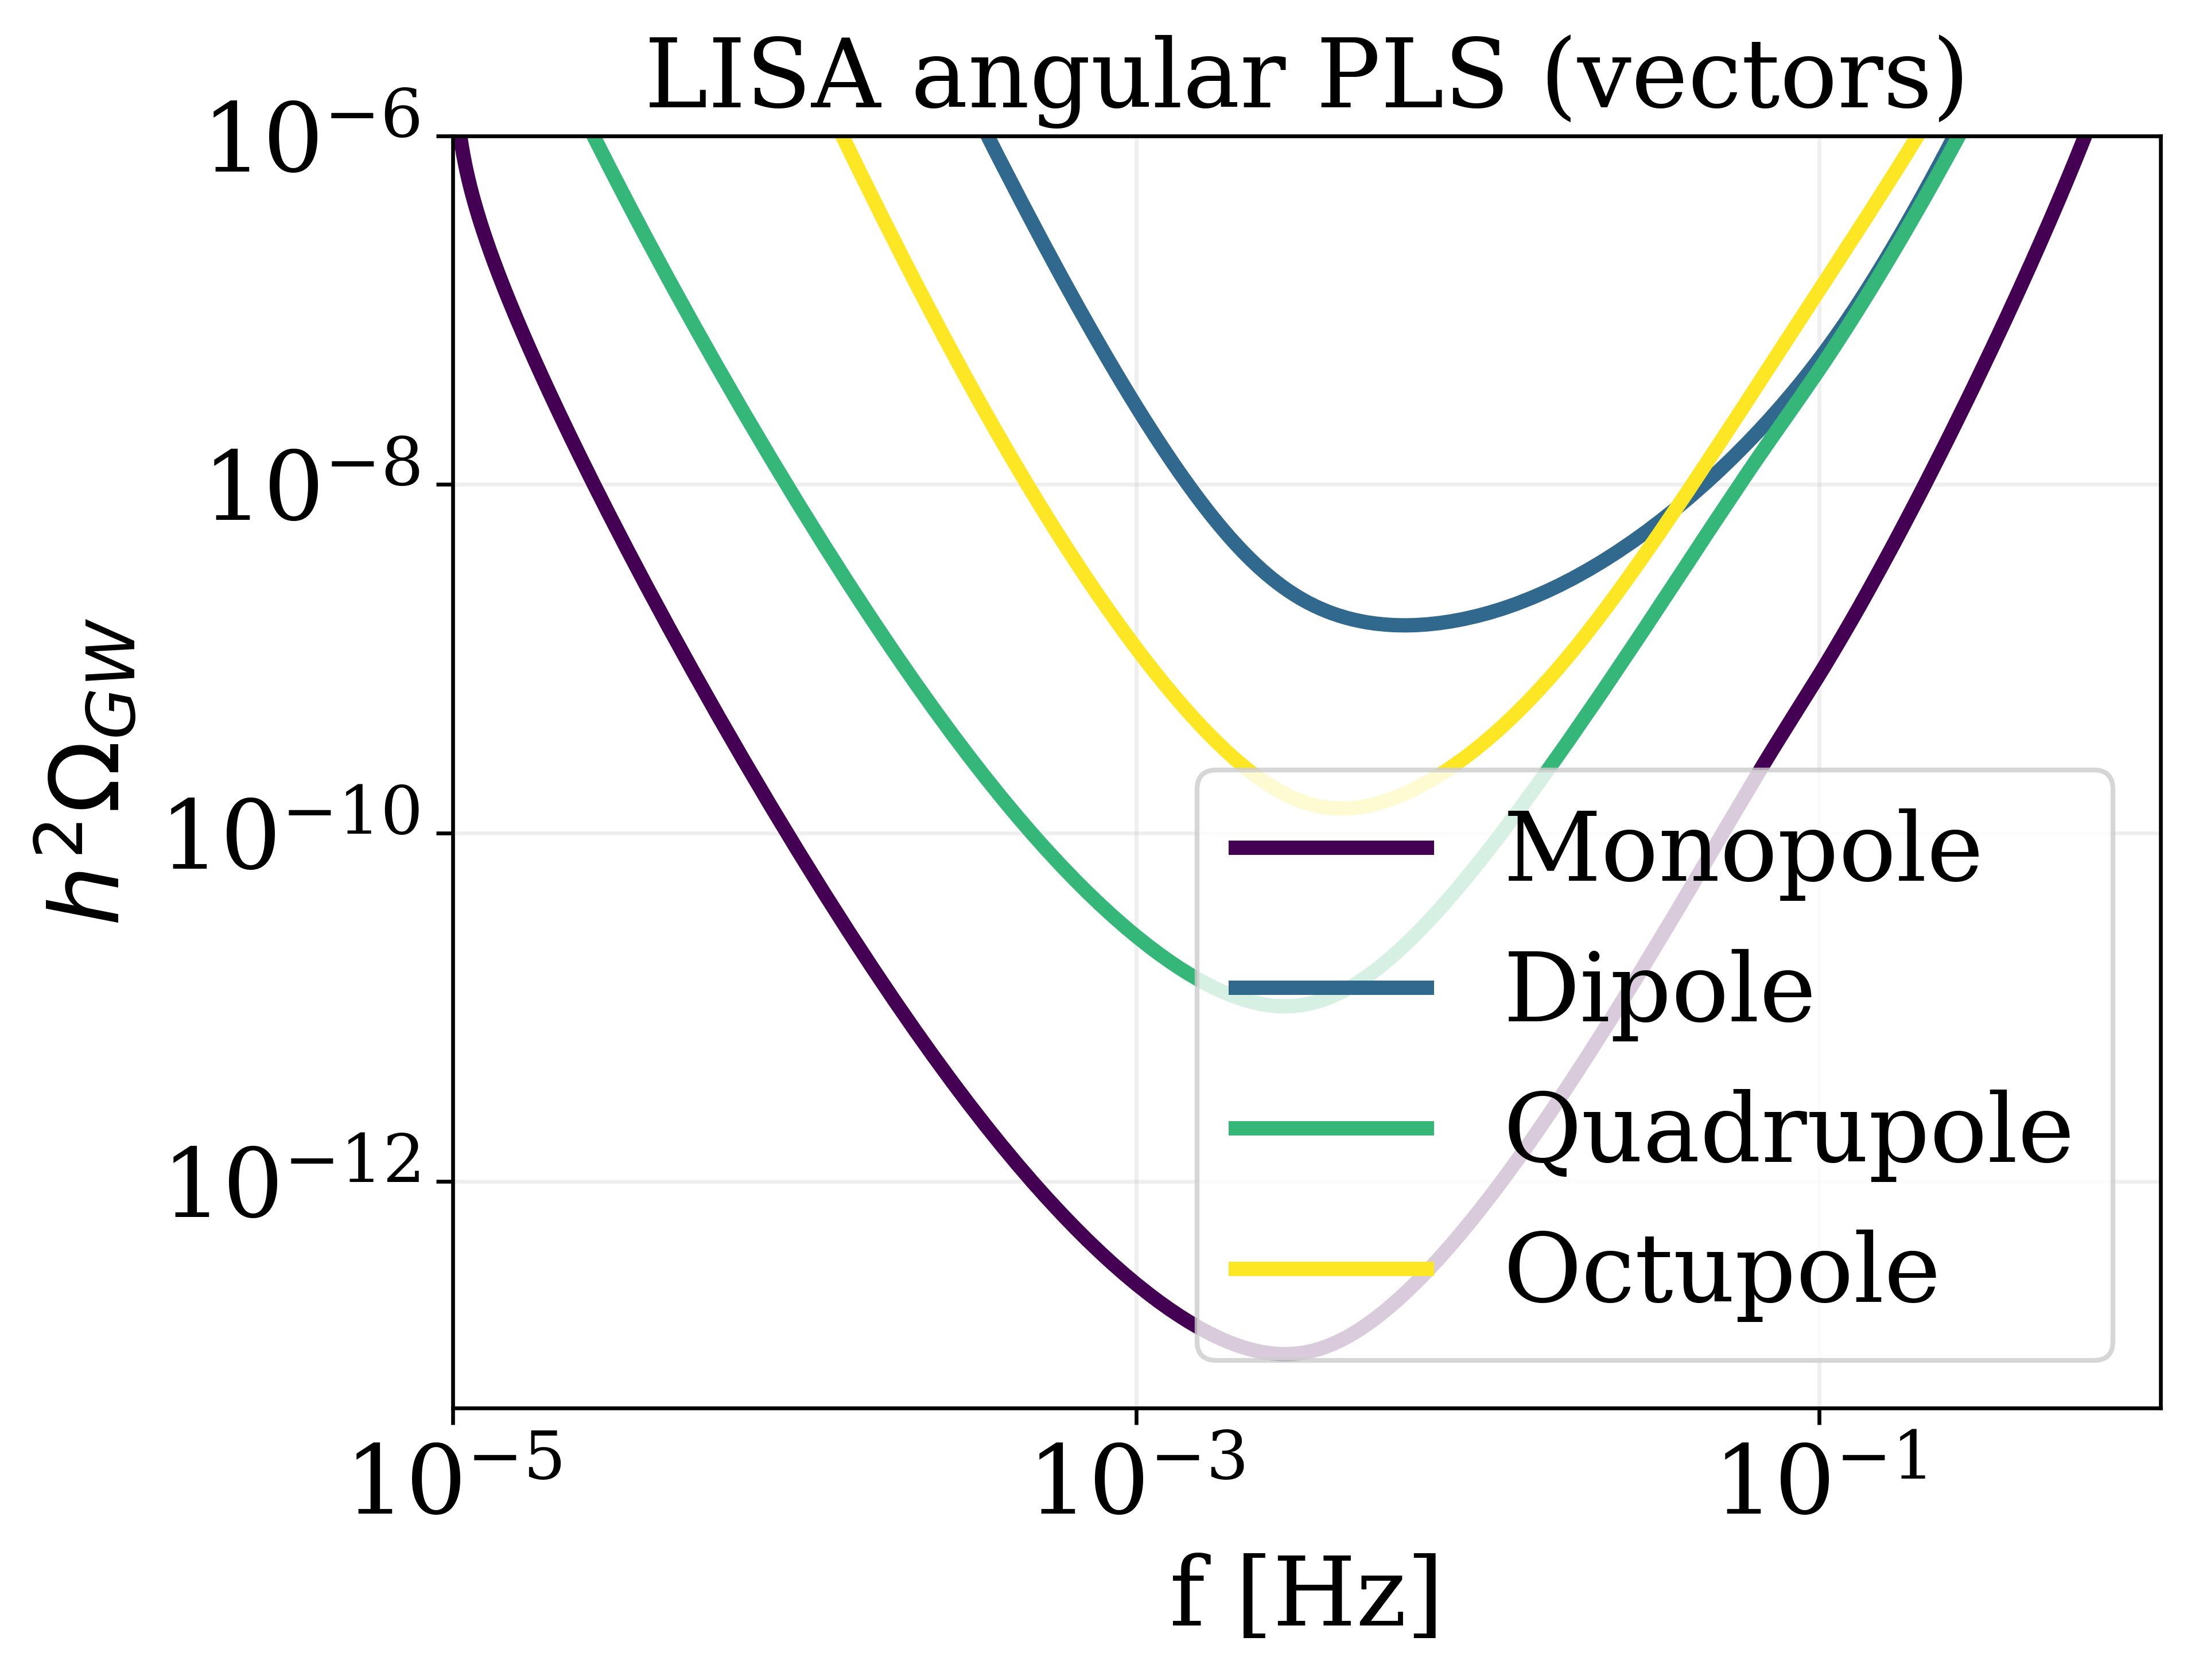

In [65]:
colors = plt.cm.viridis(np.linspace(0, 1, 4))
plt.plot(f, pls_LISA_monopole_v, label='Monopole', color=colors[0], rasterized=True)
plt.plot(f, pls_LISA_dipole_v, label='Dipole', color=colors[1], rasterized=True)
plt.plot(f, pls_LISA_quadrupole_v, label='Quadrupole', color=colors[2], rasterized=True)
plt.plot(f, pls_LISA_octupole_v, label='Octupole', color=colors[3], rasterized=True)
plt.xlim(1e-5, 1)
plt.ylim(5e-14, 1e-6)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{GW}$')
plt.grid(alpha=0.2, which='both')
plt.legend()
plt.title(r'LISA angular PLS (vectors)')

print(np.min(pls_LISA_monopole_v))
print(np.min(pls_LISA_dipole_v))
print(np.min(pls_LISA_quadrupole_v))
print(np.min(pls_LISA_octupole_v))




In [67]:
# scalar

pls_LISA_s = pls.PLS_LISA(f, fref, 's', snr, Tobs, beta_min, beta_max)
pls_LISA_monopole_s = Sensitivity_ell.PLS_l_LISA(f, 0, 's', fref, snr, Tobs, beta_min, beta_max, 1)
pls_LISA_dipole_s = Sensitivity_ell.PLS_l_LISA(f, 1, 's', fref, snr, Tobs, beta_min, beta_max, 1e-3)
pls_LISA_quadrupole_s = Sensitivity_ell.PLS_l_LISA(f, 2, 's', fref, snr, Tobs, beta_min, beta_max, 1e-3)
pls_LISA_octupole_s = Sensitivity_ell.PLS_l_LISA(f, 3, 's', fref, snr, Tobs, beta_min, beta_max, 1e-3)



/Users/ic/Desktop/GWBird/gwbird/pls.py:277: RuntimeWarning: divide by zero encountered in divide
  return np.sqrt(Ni*Nj)/np.abs(orf)


1.0127989779222467e-13
1.391107426731556e-09
5.033051605599054e-12
3.2652794764223795e-11


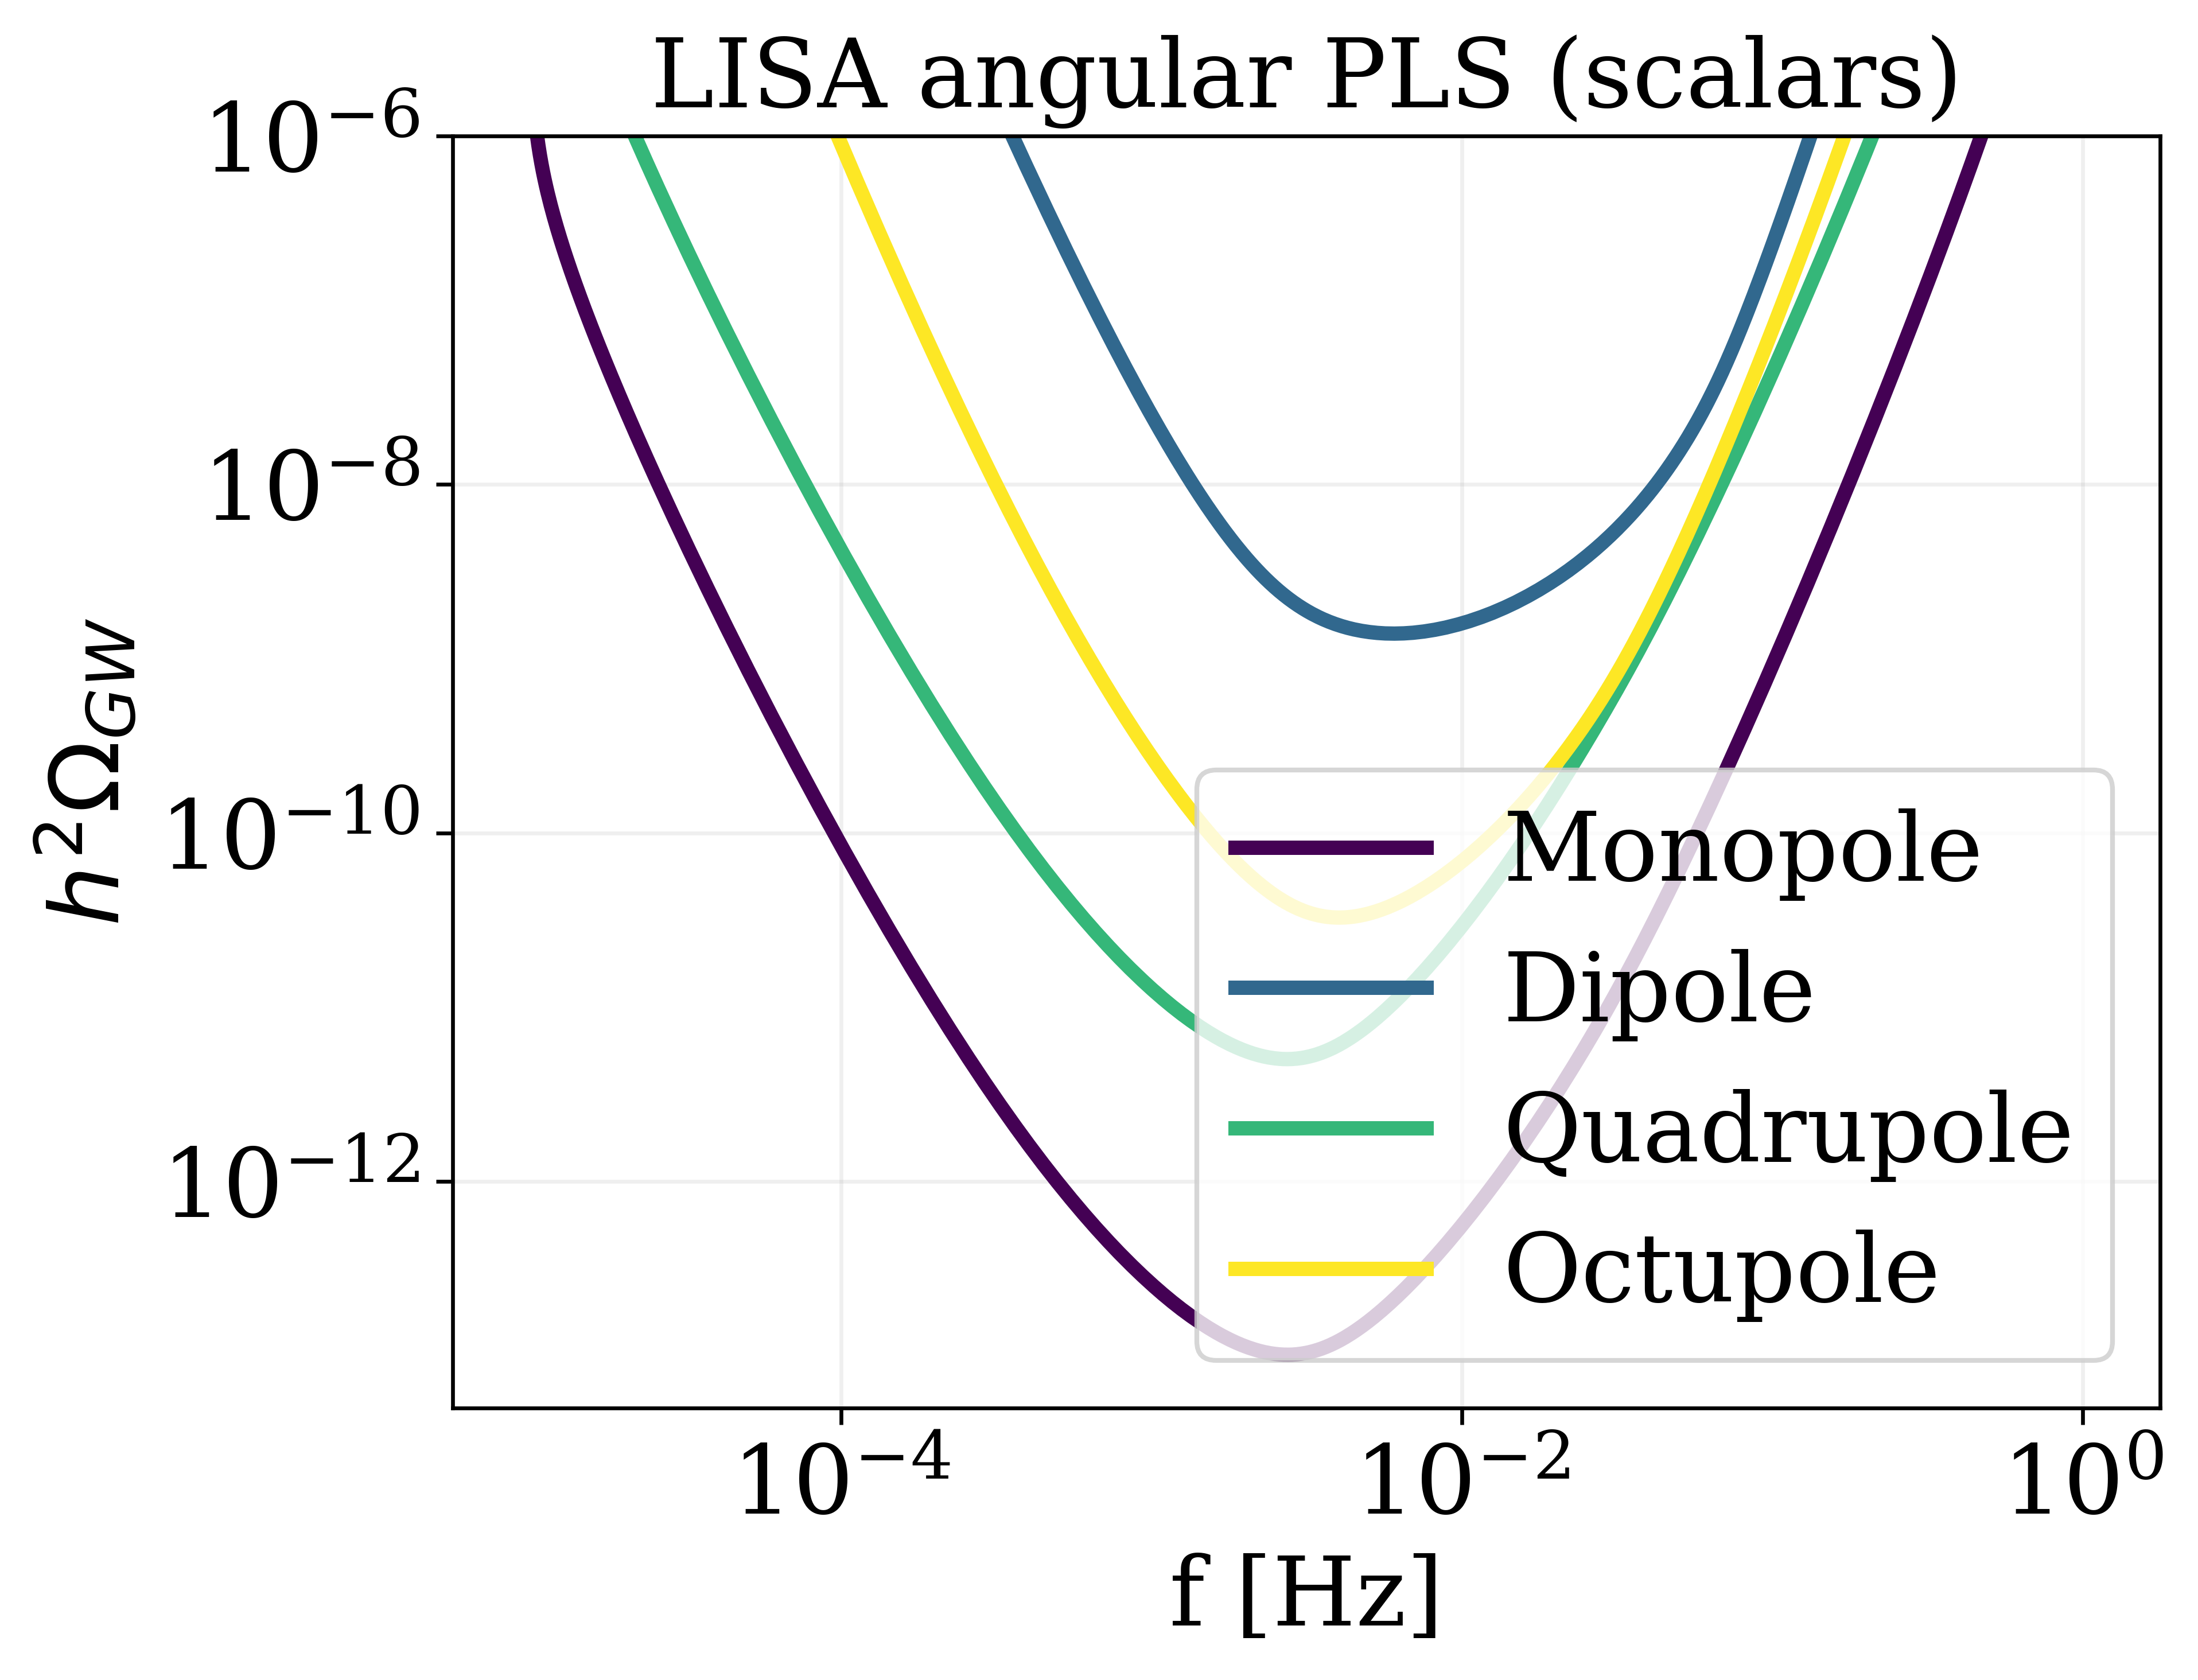

In [68]:

plt.plot(f, pls_LISA_monopole_s, label='Monopole', color=colors[0], rasterized=True)
plt.plot(f, pls_LISA_dipole_s, label='Dipole', color=colors[1], rasterized=True)
plt.plot(f, pls_LISA_quadrupole_s, label='Quadrupole', color=colors[2], rasterized=True)
plt.plot(f, pls_LISA_octupole_s, label='Octupole', color=colors[3], rasterized=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{GW}$')
plt.grid(alpha=0.2, which='both')
plt.ylim(5e-14, 1e-6)
plt.legend()
plt.title(r'LISA angular PLS (scalars)')

print(np.min(pls_LISA_monopole_s))
print(np.min(pls_LISA_dipole_s))
print(np.min(pls_LISA_quadrupole_s))
print(np.min(pls_LISA_octupole_s))